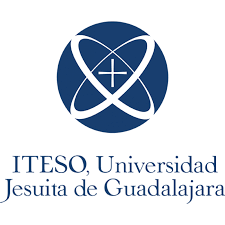

<center><font color=#555555><font size=6> Examen Final <br>

<hr style="border:0.02in solid gray"> </hr>

<center><font color=#555555><font size=5> Proyecto de ciencia de datos </font> <br> <br>
<center><font color=#555555><font size=5> Profesor: Cristian Camilo Zapata </font> <br> <br>
<center><font color=#555555><font size=4> Navarro Silva José Tonatiuh, if722399 </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> 11.2022 </a> | <font color= #555555> <font size = 4> Repositorio: <a href='https://github.com/if722399/Examen_final_DS'>Aquí</a></font>

<hr style="border:0.02in solid gray"> </hr>

<font color= #555555> <font size = 5> Objetivo: </font>

<font color= #6B6B6B> <font size = 3>  Desarrollar un proyecto de ciencia de datos de inicio a fin.

<font color= #555555> <font size = 5> Marco Teórico: </font>

<font color= #6B6B6B> <font size = 3>  En este proyecto lo que se busca es aplicar conocimientos adquiridos previamente sobre exploración y pre procesamiento de datos, así como el desarrollo de un modelo de Machine Learning para con esto incluir también lo aprendido a lo largo de estos últimos meses referente a MLOps.

<br>

# <font color= #6B6B6B> <font size = 6>Desarrollo </font>

<hr style="border:0.02in solid gray"> </hr>

<font color= brown> <font size = 5> 1. Data Exploratory Analysis </font>

Importar nuestras librerias

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
import re

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (train_test_split,
                                     StratifiedKFold,
                                     cross_validate,
                                     KFold, GridSearchCV)
from sklearn.metrics import (roc_auc_score, accuracy_score,
                             recall_score, confusion_matrix)

import functions as fn

In [3]:
# Cargar nuestros datos
df = pd.read_csv('../files/Projects_cleansed.csv').copy()

# Echar un vistazo los primeros y a los últimos renglones de nuestro dataset
display(df.head())
display(df.tail())

,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status
0,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Applied Learning,361.80,Fully Funded
1,Learning in Color!,"Help us have a fun, interactive listening cent...","Applied Learning, Literacy & Language",512.85,Expired
2,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Literacy & Language,435.92,Fully Funded
3,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Literacy & Language,161.26,Fully Funded
4,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...",Special Needs,264.19,Fully Funded


,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status
1109976,Screen Printing 101,Most of the scholars had no idea that they wou...,Music & The Arts,633.84,Fully Funded
1109977,Flexible Seating for Super Second Graders!,My students are super second graders!!! Our sc...,"Literacy & Language, Math & Science",626.24,Live
1109978,Growing Artists!,"I teach at a Title I school, and 76% of studen...","Literacy & Language, Music & The Arts",193.13,Fully Funded
1109979,TIME For Kids!,I teach at a Title I school for a district tha...,Literacy & Language,246.18,Live
1109980,Growing Digital Learners,"My preschool students are the sweetest, despit...","Applied Learning, Literacy & Language",578.16,Live


In [4]:
print(f'Este dataset contiene {df.shape[1]} columnas y {len(df)} filas.')

Este dataset contiene 5 columnas y 1109981 filas.


Observar un breve reporte de calidad de datos (si existen datos nulos, la granularidad de las variables y el tipo de datos que tenemos)

In [5]:
fn.dqr(df)

,% of nulls,unique_values,type
Project Title,0.0,926099,object
Project Short Description,0.0,841865,object
Project Subject Category Tree,0.0,51,object
Project Cost,0.0,163022,float64
Project Current Status,0.0,3,object


Nuestras variables son bastante granulares sin embargo ninguna variable contiene el mismo número de valores unicos que el número total de instancias por lo que me intriga observar los valores duplicados y por qué es que se podría deber este fenómeno, además de esto la que será nuestra variable de respuesta contiene 3 valores únicos, habrá que observarlos ya que unicamente vamos a pronósticar 1 = funded y 0 = not funded.

#### Modificación a la variable de respuesta

In [7]:
df.iloc[0:,-1].unique()

array(['Fully Funded', 'Expired', 'Live'], dtype=object)

Me hace sentido hacer el reemplazo de `Fully Funded` por el valor de **1** y las categorías de `Expired` y `Live` por **0**, sin embargo antes de hacer este reemplazo quiero ver si existen valores repetidos en `Project Title` y `Project Short Description` que contengan categorías diferentes en la bariable del estatus de proyecto

In [8]:
df_grouped = df.groupby('Project Short Description').agg({'Project Current Status':'nunique',
                                                                          'Project Subject Category Tree':'nunique',
                                                                         'Project Title':'nunique',
                                                             'Project Cost':'nunique'})

Lo que se quiere lograr es que a través de la descripción podamos pronosticar el estatus en Funded y Not Funded entonces lo primero que haré para tratar esos valores duplicados que tenemos es ver si tenemos alguna descripción asociada a un estatus `Fully Funded` y un `Expired`, lo que espero es que no haya para asi poder darle un drop a los duplicados y catalogar aquellas descripciones que cuentan con los estatus `Fully Funded` y `Live` como un **1**

In [9]:
df_grouped

,Project Current Status,Project Subject Category Tree,Project Title,Project Cost
Project Short Description,,,,
\n,1,2,2,2
"\nHigh Touch High Tech provides students with a fun, educational, hands-on, in-school science field trip. My students love science and are looking forward to exciting hands-on projects.",1,1,1,1
,1,1,1,1
"We are a school-wide Title I school. sOur students are hardworking, inquisitive, and",1,1,1,1
"! Our students work so hard to be the best leaders they can be. Our school is located in Memphis, TN, and many of our students come from homes with obstacles to overcome. Most of my students come...",1,1,1,1
...,...,...,...,...
This year is the first school year for my school. We are so proud to be entering the lives of a very promising and diverse group of children and families. My school has a school for boys and a...,1,1,1,1
"I teach a class of students with Special Needs or as we call it, Life Skills. My school is located in the middle of a large city; it is urban and impoverished. The community surrounding the...",1,2,3,3
Math is different than when I was nine. Students who learn math need to master key concepts in multiplication and division in order to become efficient and fluent. This is not easy to understand...,1,1,1,1


In [10]:
df_grouped[df_grouped['Project Current Status']==3]

,Project Current Status,Project Subject Category Tree,Project Title,Project Cost
Project Short Description,,,,
"""A teacher takes a hand, opens a mind, and touches a heart."" I love this quote because this is how I approach teaching. My students love to read and write. Providing a classroom that fosters and...",3,1,3,3
"""All kids need is a little help, a little hope, and someone who believes in them."" \n\nMany of my students are sleeping in motel rooms, sharing a one bedroom home with other families, sleeping on...",3,9,24,23
"""All of us do not have equal talent, but all of us should have equal opportunity to develop our talents."" John F. Kennedy. This quote cannot be more true for my students. Their talents are hidden...",3,5,11,11
"""Any book that helps a child to form a habit of reading, to make reading one of his deep and continuing needs, is good for him."" - Richard McKenna\n\nMy students are a group of wonderfully diverse...",3,2,3,3
"""Awaken people's curiosity. It is enough to open minds, do not overload them. Put there just a spark. If there is some good inflammable stuff, it will catch fire.""\n Anatole France\n\nMy students...",3,5,6,6
...,...,...,...,...
"You will often find my students gathered on the rug, brainstorming ideas for projects. My students are a diverse group of learners. Some are English Language Learners who speak other languages at...",3,9,14,14
You would think someone purposely gave my students an energizing drink before school. They arrive to school amped and ready to be active. It is my duty and pleasure to meet their needs...,3,4,7,8
"Zoltan Kodaly once said, ""Real art is one of the most powerful forces in the rise of mankind, and he who renders it accessible to as many people as possible is a benefactor of humanity."" \n\nOur...",3,3,20,18


<font color= brown> <font size = 5> 2. Data Wrangling </font>

Vemos que hay descripciones que han tenido los 3 estatus por lo que lo que haré será marcar a todos los que alguna ves tuvieron un estatus `Fully Funded` como un 1 y todos los demás como un 0 ya que se encontrarán en live o expired y nunca han tenido un estatus `Fully Funded` y los que aún se siguen evaluando realmente no tienen evidencia de que si se vayan a fondear

In [11]:
response = {'Fully Funded':1,'Expired':0,'Live':0}
df['Project Current Status'].replace(response, inplace=True)

In [12]:
to_drop = df[(df['Project Short Description'].duplicated()) & (df['Project Current Status']==0)].index

Después de desechar aquellos duplicados que tenian un estatus = 0 ahora podemos desechar sin problema todos los demás duplicados, dado que todos tienen estatus 1 y la duplicidad se da debido a que el título del proyecto es diferente o el costo

In [13]:
df2 = df[~df.index.isin(to_drop)]
df3 = df2.drop_duplicates(subset='Project Short Description')

In [14]:
fn.dqr(df3)

,% of nulls,unique_values,type
Project Title,0.0,717503,object
Project Short Description,0.0,841865,object
Project Subject Category Tree,0.0,51,object
Project Cost,0.0,152019,float64
Project Current Status,0.0,2,int64


In [15]:
df3['Project Current Status'].value_counts()

1    625969
0    215896
Name: Project Current Status, dtype: int64

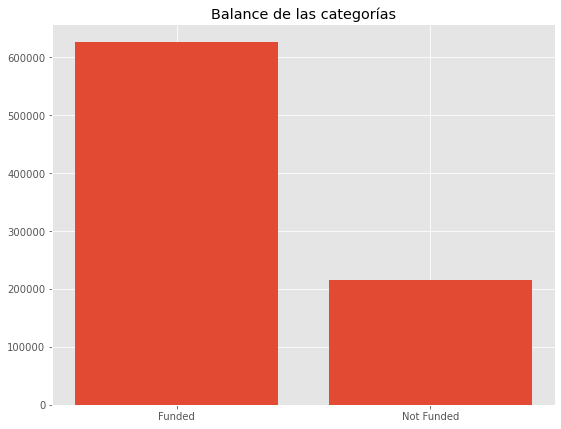

In [16]:
plt.figure(figsize=(9,7))
plt.bar(x = ['Funded','Not Funded'], height = df3['Project Current Status'].value_counts().values)
plt.title('Balance de las categorías');

In [17]:
df3

,Project Title,Project Short Description,Project Subject Category Tree,Project Cost,Project Current Status
0,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Applied Learning,361.80,1
1,Learning in Color!,"Help us have a fun, interactive listening cent...","Applied Learning, Literacy & Language",512.85,0
2,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Literacy & Language,435.92,1
3,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Literacy & Language,161.26,1
4,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...",Special Needs,264.19,1
...,...,...,...,...,...
1109975,Help My Students be Shaped by the Books They R...,I love that my students are passionate about r...,Literacy & Language,233.15,0
1109976,Screen Printing 101,Most of the scholars had no idea that they wou...,Music & The Arts,633.84,1
1109977,Flexible Seating for Super Second Graders!,My students are super second graders!!! Our sc...,"Literacy & Language, Math & Science",626.24,0
1109978,Growing Artists!,"I teach at a Title I school, and 76% of studen...","Literacy & Language, Music & The Arts",193.13,1


In [18]:
def check_for_digits(string): 
    
    digit_regex = r'\d+' # busca todos los dígitos que aparezcan uno o más veces (juntos)
    digits = re.findall(digit_regex,string)
    return len(digits)

In [20]:
df3['longitud_texto'] = df3['Project Short Description'].apply(lambda x: len(x))
df3['n_palabras'] = df3['Project Short Description'].apply(lambda x: len(x.split(' ')))
df3['check_citation'] = df3['Project Short Description'].apply(lambda x: 1 if '"' in x else 0)
df3['check_digits'] = df3['Project Short Description'].apply(lambda x: check_for_digits(x))
df3['check_admiration'] = df3['Project Short Description'].apply(lambda x: 1 if '!' in (x) else 0)

In [21]:
df_final = df3.loc[:,['longitud_texto','n_palabras','check_citation','check_digits','check_admiration','Project Current Status']]

[[27, 5, 0, 2, 1]]

<font color= brown> <font size = 5> 3. Entrenamiento, validación, evaluación y selección del modelo </font>

In [27]:
response = ['Project Current Status']
predictors = [c for c in df_final if c not in response]

x_train, x_test, y_train, y_test = train_test_split(
    df_final[predictors],
    df_final[response],
    test_size = .2,
    random_state = 17
)

In [35]:
# Model
from multiprocessing import cpu_count
rf = RandomForestClassifier(n_estimators = 750,
                           criterion = 'gini',
                           max_depth = 10,
                           max_features = 5,
                           n_jobs = cpu_count() - 2,
                           bootstrap = True,
                           max_samples = .8,
                           random_state = 17)

In [36]:
# Fit
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features=5, max_samples=0.8,
                       n_estimators=750, n_jobs=6, random_state=17)

In [37]:
# P(y="Funded" | X)
scores = rf.predict_proba(x_test)[:, 1]

In [38]:
roc_auc_score(y_score=scores, y_true=y_test)

0.5131407592040416

La métrica de performance es pésima, esto es debido a que los predictores no son útiles para clasificar lo que queremos

In [44]:
import pickle
pickle.dump(rf, open('text_model.pickle', 'wb'))

In [88]:
a = [[i] for i in x_test.loc[737323].values]
a

[[195], [39], [0], [0], [0]]

In [90]:
x_test

,longitud_texto,n_palabras,check_citation,check_digits,check_admiration
737323,195,39,0,0,0
954298,195,33,0,0,0
1042183,195,28,0,0,0
808456,199,32,0,0,0
223748,198,32,0,0,0
...,...,...,...,...,...
308752,191,39,1,1,1
951802,199,36,0,0,0
110356,190,36,0,0,1
488383,198,35,0,0,0


In [103]:
#loaded_model = pickle.load(open('text_model.pickle', 'rb'))
# result = loaded_model.predict_proba(get_predictors('string'))
# result[0][1]

0.7981843437304496

# <font color= #6B6B6B> <font size = 6> Bibliografía </font>

<hr style="border:0.02in solid gray"> </hr>

Unicamente se consultó código proporcionado en clases.

<br>